<a href="https://colab.research.google.com/github/sakarimov/my_learning_logs/blob/main/basic-machine-learning/Assignment_Supervised_ML_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [7]:
!wget --no-check-certificate \
 https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
 -O /tmp/messi-vs-clean-room.zip

--2023-05-29 03:29:43--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 205.185.216.42, 205.185.216.10
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|205.185.216.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messi-vs-clean-room.zip’

/tmp/messi-vs-clean 100%[===================>]  67.13M   258MB/s    in 0.3s    

2023-05-29 03:29:44 (258 MB/s) - ‘/tmp/messi-vs-clean-room.zip’ saved [70392746/70392746]



In [8]:
import zipfile,os

local_zip = '/tmp/messi-vs-clean-room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [10]:
os.listdir('/tmp/images/train')

['clean', 'messy']

In [11]:
os.listdir('/tmp/images/val')

['clean', 'messy']

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 4,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 4,
    class_mode = 'binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [18]:
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy'])

In [20]:
model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2
)

Epoch 1/20
25/25 - 23s - loss: 0.7002 - accuracy: 0.5800 - val_loss: 0.6826 - val_accuracy: 0.5000 - 23s/epoch - 903ms/step
Epoch 2/20
25/25 - 33s - loss: 0.6901 - accuracy: 0.5900 - val_loss: 0.6928 - val_accuracy: 0.5000 - 33s/epoch - 1s/step
Epoch 3/20
25/25 - 18s - loss: 0.6965 - accuracy: 0.4700 - val_loss: 0.6928 - val_accuracy: 0.5000 - 18s/epoch - 732ms/step
Epoch 4/20
25/25 - 19s - loss: 0.6717 - accuracy: 0.6500 - val_loss: 0.5862 - val_accuracy: 0.6500 - 19s/epoch - 767ms/step
Epoch 5/20
25/25 - 18s - loss: 0.6030 - accuracy: 0.7000 - val_loss: 0.5397 - val_accuracy: 0.6500 - 18s/epoch - 738ms/step
Epoch 6/20
25/25 - 20s - loss: 0.5650 - accuracy: 0.7400 - val_loss: 0.3325 - val_accuracy: 0.8500 - 20s/epoch - 789ms/step
Epoch 7/20
25/25 - 18s - loss: 0.7165 - accuracy: 0.6900 - val_loss: 0.6459 - val_accuracy: 0.5500 - 18s/epoch - 738ms/step
Epoch 8/20
25/25 - 20s - loss: 0.6330 - accuracy: 0.6800 - val_loss: 0.5101 - val_accuracy: 0.8500 - 20s/epoch - 802ms/step
Epoch 9/20


Saving 8b413559ba17fef612c9c19d328f28cb26e069ca.webp to 8b413559ba17fef612c9c19d328f28cb26e069ca.webp
1/1 [==============================] - 0s 81ms/step
8b413559ba17fef612c9c19d328f28cb26e069ca.webp
clean


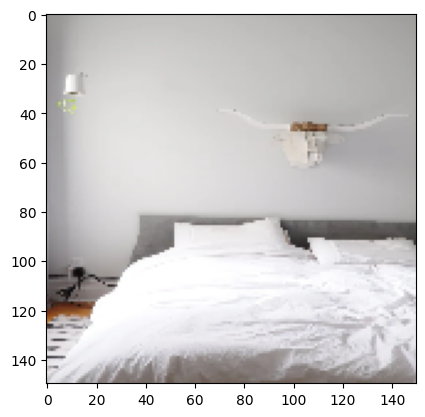

In [25]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size = (150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size = 10)
  print(fn)
  if classes == 0:
    print('clean')
  else:
    print('messy')